# Description of dataset and variables
https://www.kaggle.com/apapiu/regularized-linear-models/data 

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model
from keras import metrics
from keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [3]:
df1 = pd.read_csv('train.csv') # use only the train data from Kaggle
df1.shape #(1460, 81)

(1460, 81)

In [0]:
df1.info()

In [4]:
# subset dataset and select only interested variables
df2 = df1.loc[:,['SalePrice','MSSubClass','LotFrontage','LotArea','OverallQual', 'OverallCond','YearRemodAdd',
                 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr','1stFlrSF' 'GarageArea','OpenPorchSF','EnclosedPorch']]
df2.shape # (1460, 13)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


(1460, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
SalePrice             1460 non-null int64
MSSubClass            1460 non-null int64
LotFrontage           1201 non-null float64
LotArea               1460 non-null int64
OverallQual           1460 non-null int64
OverallCond           1460 non-null int64
YearRemodAdd          1460 non-null int64
FullBath              1460 non-null int64
BedroomAbvGr          1460 non-null int64
KitchenAbvGr          1460 non-null int64
1stFlrSFGarageArea    0 non-null float64
OpenPorchSF           1460 non-null int64
EnclosedPorch         1460 non-null int64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB


0

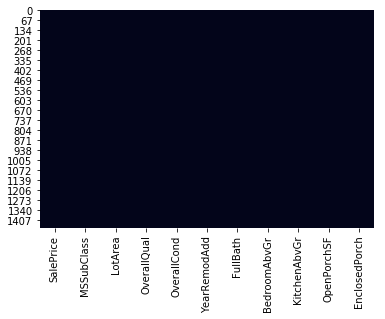

In [5]:
# inspect missing values
df2.info()
sns.heatmap(df2.isnull(), cbar=False) # the plot shows 'LotFrontage' and '1stFlrSF'have lots of missing values
df3 = df2.drop(['LotFrontage', '1stFlrSFGarageArea'], axis=1)

sns.heatmap(df3.isnull(), cbar=False) 
df_complt = df3
df_complt.isnull().sum().sum() # 0. it means there is no missing values in df_complt 

In [0]:
# divide features and target variable

X = df_complt.iloc[:,1:]
Y = df_complt[['SalePrice']]


In [0]:
# scale the features(predictors)
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [0]:
# train, validation, test split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.4) # 60% goes to train data
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5) # 20% goes to validation, 20% goes to test

In [9]:
# make sure things are split up correctly
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(876, 10) (292, 10) (292, 10) (876, 1) (292, 1) (292, 1)


# Modle 1 setting 
    

In [0]:
# define model 1
def model_1(x_size, y_size):
    dnn_model = Sequential()
    dnn_model.add(Dense(64, activation="tanh", input_shape=(x_size,)))
    dnn_model.add(Dense(64, activation="relu"))
    dnn_model.add(Dense(y_size))
    print(dnn_model.summary())
    dnn_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(dnn_model)

In [11]:
# create model 1
model_1 = model_1(X_train.shape[1], Y_train.shape[1])
model_1.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160    

In [0]:
# define epochs and batch size 
epochs = 100
batch_size = 10

# Model 1 training

In [0]:
history = model_1.fit(X_train, Y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2,
    validation_data=(X_val, Y_val))

# Model 1 performance check 

In [14]:
train_score = model_1.evaluate(X_train, Y_train, verbose=0)
valid_score = model_1.evaluate(X_val, Y_val, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  47592.8647 , Train Loss:  5428547406.9041
Val MAE:  46464.7159 , Val Loss:  5898360618.0822


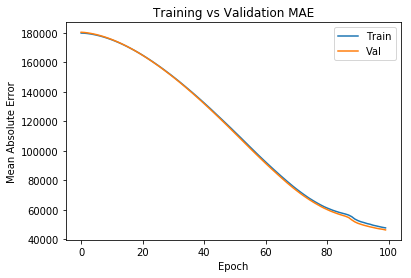

In [16]:
# plot MAE error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Training vs Validation MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

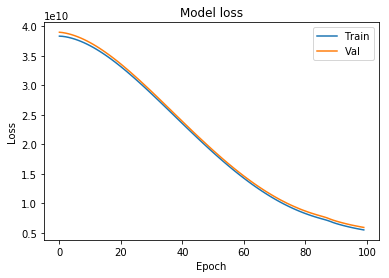

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Model 2 setting
* increase nodes in the hidden layers
* add dropout
* use relu only relu activation


In [0]:
def model_2(x_size, y_size):
    dnn_model = Sequential()
    dnn_model.add(Dense(100, activation="relu", input_shape=(x_size,)))
    dnn_model.add(Dropout(0.3))
    dnn_model.add(Dense(80, activation="relu"))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(40, activation="relu"))
    dnn_model.add(Dropout(0.1))
    dnn_model.add(Dense(20, activation="relu"))
    dnn_model.add(Dropout(0.))
    dnn_model.add(Dense(y_size))
    print(dnn_model.summary())
    dnn_model.compile(loss='mean_squared_error',
        optimizer=Adam(),
        metrics=[metrics.mae])
    return(dnn_model)

In [18]:
# create model 2
model_2 = model_2(X_train.shape[1], Y_train.shape[1])
model_2.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               1100      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 80)                8080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 40)                3240      
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
___________________________

In [0]:
# train model 2
history = model_2.fit(X_train, Y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2,
    validation_data=(X_val, Y_val))

In [21]:

train_score = model_2.evaluate(X_train, Y_train, verbose=0)
valid_score = model_2.evaluate(X_val, Y_val, verbose=0)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  26846.4027 , Train Loss:  1616687778.1918
Val MAE:  28891.16 , Val Loss:  1950358922.5205


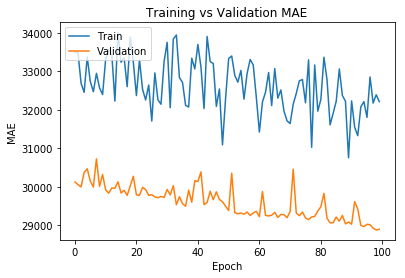

In [23]:
# plot MAE
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Training vs Validation MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
    


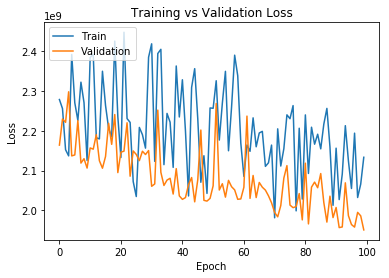

In [24]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')